### Importing the Libraries

In [12]:
!pip install seaborn

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


### Loading the mental health dataset into a dataset

In [13]:
data = pd.read_csv("/kaggle/input/qemlll/Mental_health_prediction.csv")
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 1:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


### Some statistics and information about the dataset

In [14]:
print(data.describe())
print(data.info())

                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   objec

### Data Preprocessing

In [15]:
#Checking for missing values
data.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [16]:
#complete missing age with median
data['Age'].fillna(data['Age'].median(), inplace = True)

In [17]:
data['Age'].value_counts()

Age
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72     

In [18]:
# Replace age values below 18 with the median age
s = pd.Series(data['Age'])
s[s < 18] = data['Age'].median()
data['Age'] = s

# Replace age values above 120 with the median age
s = pd.Series(data['Age'])
s[s > 120] = data['Age'].median()
data['Age'] = s

# Create age ranges
data['age_range'] = pd.cut(data['Age'], [0, 20, 30, 65, 100, np.inf], labels=["0-20", "21-30", "31-65", "66-100", "101+"], include_lowest=True)


In [19]:
data['Age'].value_counts()

Age
29    85
32    82
26    75
31    75
27    71
33    70
28    68
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
55     3
57     3
54     3
47     2
60     2
58     1
62     1
65     1
53     1
61     1
72     1
Name: count, dtype: int64

In [20]:
#Dropping unimportant columns
data.drop(['comments'], axis= 1, inplace=True)
data.drop(['state'], axis= 1, inplace=True)
data.drop(['Timestamp'], axis= 1, inplace=True)

data.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-65
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,31-65
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,31-65
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,31-65
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31-65


In [21]:
data['Gender'].value_counts()

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

In [22]:
# Correcting Gender Column
gender_dict = {
    'Male': ['male', 'M', 'm', 'Make', 'cis Male', 'Man', 'Male', 'msle', 'Cis Male', 'Mail', 'Malr', 'Cis Man', 'Guy (-ish) ^_^', 'Male-ish', 'maile', 'Mal', 'Male (CIS)', "something kinda male?"],
    'trans': ["Trans-female", "trans_woman", "Female (trans)", 'Trans woman', "Androgyne", "male leaning androgynous"],
    'gender_queer': ["queer/she/they", "Agender", "non-binary", "Neuter", "queer", 'Genderqueer', "ostensibly male, unsure what that really means", "Enby", "fluid", "gender_queer"],
    'Female': ["Cis Female", "f", 'F', "Female", "woman", "Femake", "female", "cis-female/femme", "Female (cis)", "femail"],
    'Don_not_know': ["Nah", "All", 'p', 'A little about you']
}

for index, record in data['Gender'].iterrows():
    for k, v in gender_dict.items():
        if record in v:
            data.at[index, 'Gender'] = k


AttributeError: 'Series' object has no attribute 'iterrows'

In [ ]:
#correcting Gender Column
gender_dict = {'Male' : ['male', 'M', 'm', 'Make', 'cis Male', 'Man', 'Male', 'msle', 'Cis Male', 'Mail', 'Malr', 'Cis Man', 'Guy (-ish) ^_^','Male-ish', 'maile', 'Mal', 'Male (CIS)',"something kinda male?"],
'trans' : ["Trans-female", "trans_woman",  "Female (trans)", 'Trans woman',"Androgyne", "male leaning androgynous"],           
'gender_queer' : ["queer/she/they", "Agender", "non-binary", "Neuter", "queer", 'Genderqueer',"ostensibly male, unsure what that really means", "Enby", "fluid", "gender_queer"], 
'Female' : ["Cis Female", "f", 'F',"Female", "woman",  "Femake", "female","cis-female/femme", "Female (cis)", "femail"],
'Don_not_know' : [ "Nah", "All", 'p','A little about you']}

for index,record in df['Gender'].iteritems():
  for k,v in gender_dict.items():
    if record in v:
      df.at[index,'Gender']= k
    

In [ ]:
data['Gender'].value_counts()

In [ ]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in data:
    if feature in intFeatures:
        data[feature] = data[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        data[feature] = data[feature].fillna(defaultString)
    elif feature in floatFeatures:
        data[feature] = data[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
data.head()

In [ ]:
default = 'NaN'
data['self_employed'] = data['self_employed'].replace([default], 'No')
print(data['self_employed'].unique())

In [ ]:
data['work_interfere'] = data['work_interfere'].replace([default], 'Don\'t know')
print(data['work_interfere'].unique())

In [ ]:
#Checking for missing 
data.isna().sum()

In [28]:
# Filter the DataFrame to remove any rows where age < 18
data = data.loc[data['Age'] >= 18]

# Confirm that there are no rows with age < 18
print(data['Age'].min())


18


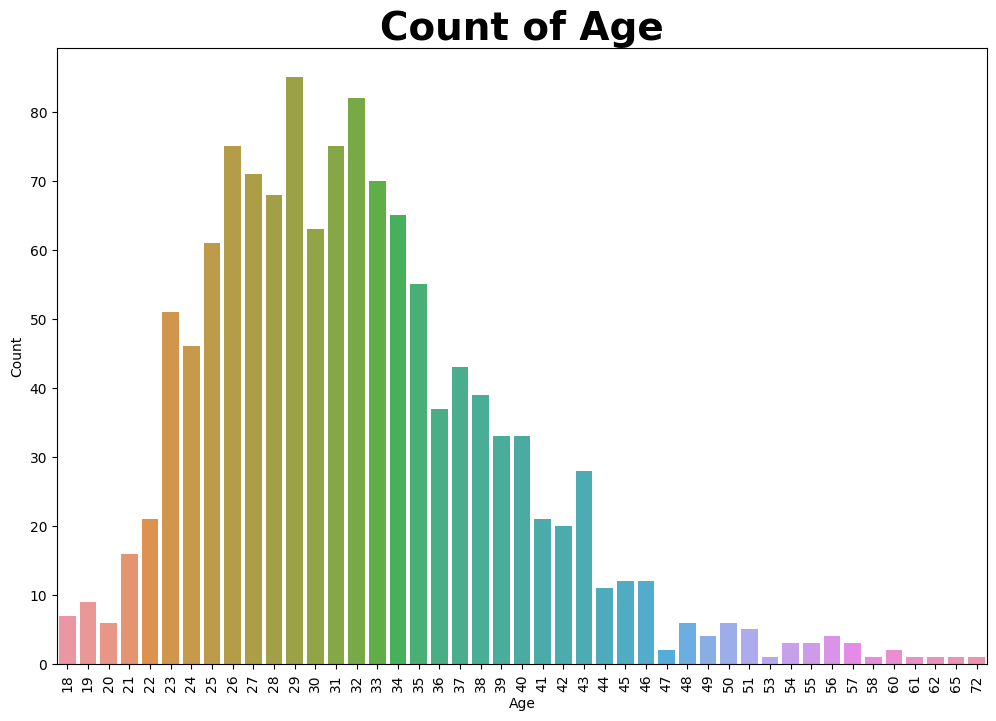

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of age counts
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x="Age")
plt.title("Count of Age", size=28, fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

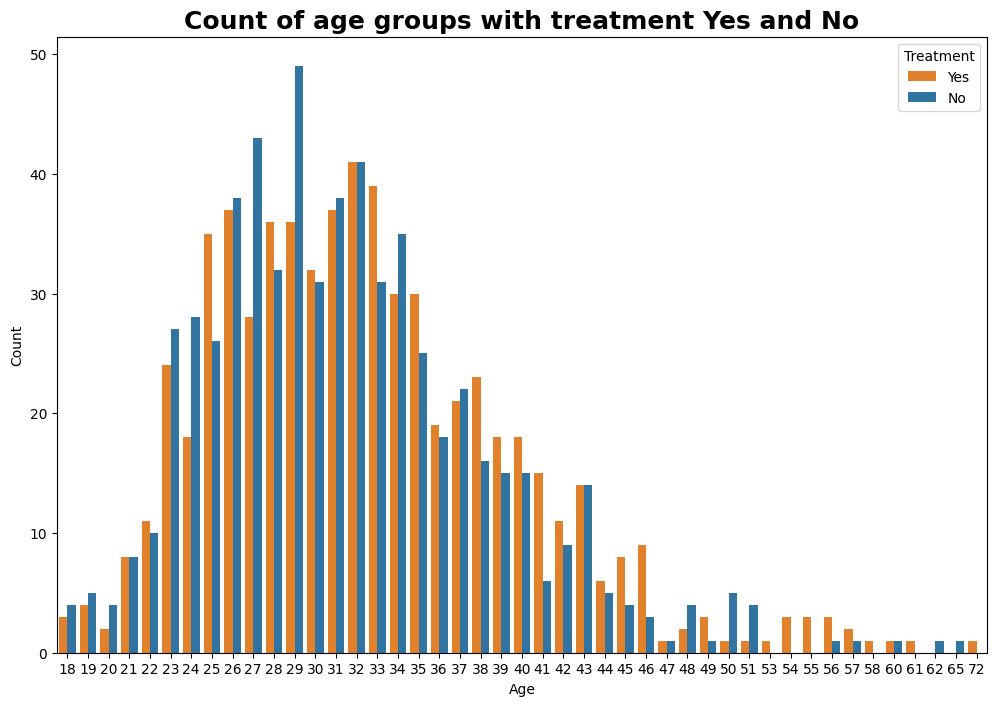

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))

# Define custom colors
colors = ["#FF7F0E", "#1F77B4"]

# Create the bar plot
sns.countplot(data=data, x="Age", hue="treatment", hue_order=["Yes", "No"], palette=colors)

# Set the axis labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count of age groups with treatment Yes and No", size=18, fontweight="bold")

# Display the legend
plt.legend(title="Treatment", loc="upper right")

# Show the plot
plt.show()


### Exploratory Data Analysis

In [20]:
#Encoding the data
labelDict = {}
for feature in data:
    le = preprocessing.LabelEncoder()
    le.fit(data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['A little about you', 'Agender', 'All', 'Androgyne', 'Cis Female', 'Cis Male', 'Cis Man', 'Enby', 'F', 'Femake', 'Female', 'Female ', 'Female (cis)', 'Female (trans)', 'Genderqueer', 'Guy (-ish) ^_^', 'M', 'Mail', 'Make', 'Mal', 'Male', 'Male ', 'Male (CIS)', 'Male-ish', 'Malr', 'Man', 'Nah', 'Neuter', 'Trans woman', 'Trans-female', 'Woman', 'cis male', 'cis-female/femme', 'f', 'femail', 'female', 'fluid', 'm', 'maile', 'male', 'male leaning androgynous', 'msle', 'non-binary', 'ostensibly male, unsure what that really means', 'p', 'queer', 'queer/she/they', 'something kinda male?', 'woman']
label_Country ['Australia', 'Austria', 'Bahamas, The', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark'

In [22]:
# pandas
!pip install pandas

# numpy
!pip install numpy

# scikit-learn
!pip install -U scikit-learn

# Qiskit
!pip install qiskit

# Qiskit Machine Learning
!pip install qiskit-machine-learning


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 57.7 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 KB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 69.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from qiskit import BasicAer
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.algorithms import QSVC
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel

# Assuming your dataframe is named df
data = data[['age_range', 'Gender', 'family_history', 'remote_work', 'treatment']]

# Select the numeric features and normalize them
features = StandardScaler().fit_transform(data.iloc[:, :-1])

# Perform train-test split
train_features, test_features, train_labels, test_labels = train_test_split(
    features, data['treatment'], train_size=0.8, random_state=42
)

# Train a classical SVC model
svc = SVC()
svc.fit(train_features, train_labels)
svc_preds = svc.predict(test_features)
print("Classical SVC results:")
print(classification_report(test_labels, svc_preds))

# Train a quantum SVC model
num_features = features.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=quantum_instance)
qsvc = QSVC(quantum_kernel=quantum_kernel)
qsvc.fit(train_features, train_labels)
qsvc_preds = qsvc.predict(test_features)
print("Quantum SVC results:")
print(classification_report(test_labels, qsvc_preds))


Classical SVC results:
              precision    recall  f1-score   support

           0       0.66      0.78      0.71       129
           1       0.71      0.57      0.63       123

    accuracy                           0.68       252
   macro avg       0.69      0.68      0.67       252
weighted avg       0.68      0.68      0.67       252



/tmp/ipykernel_5498/1479327463.py:35: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)


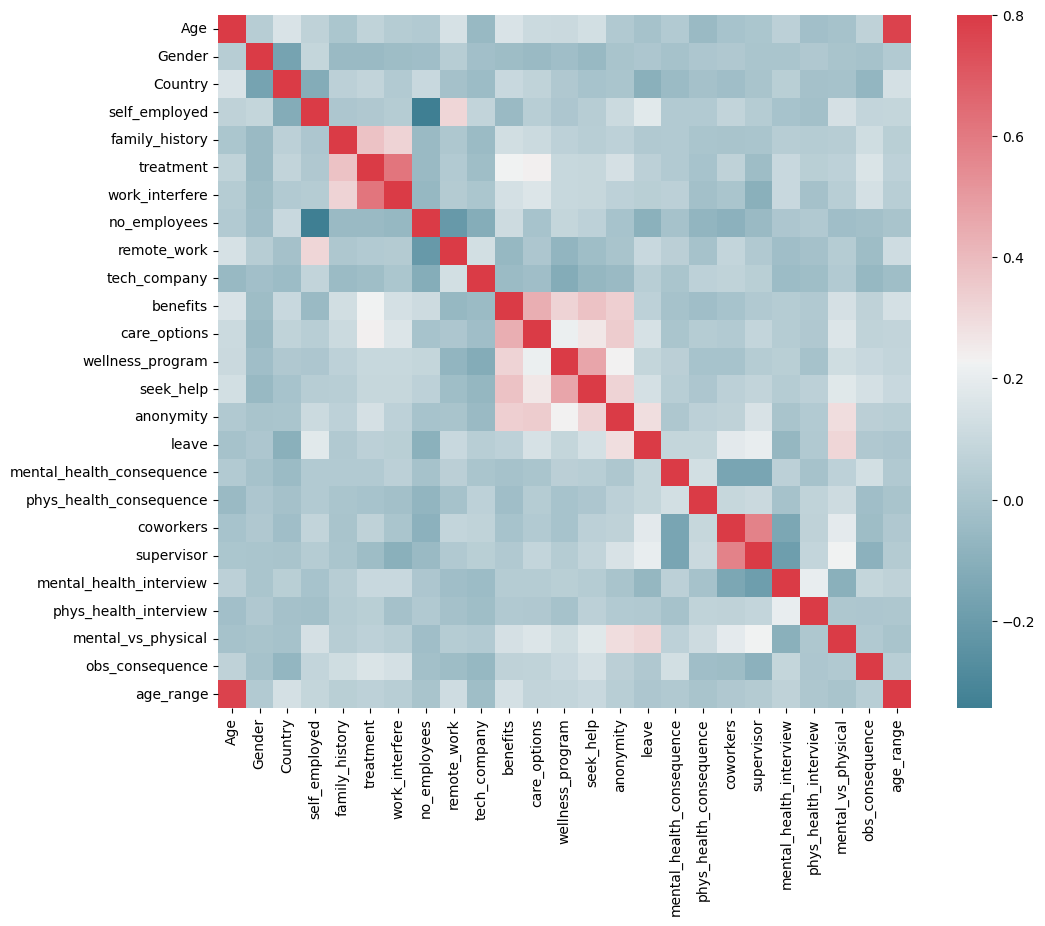

In [19]:
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Create correlation matrix
    corrmat = data.corr()

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(12, 9))

    # Define a custom color palette
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Create the heatmap using seaborn
    sns.heatmap(corrmat, vmax=0.8, square=True, cmap=cmap)

    # Display the heatmap
    plt.show()


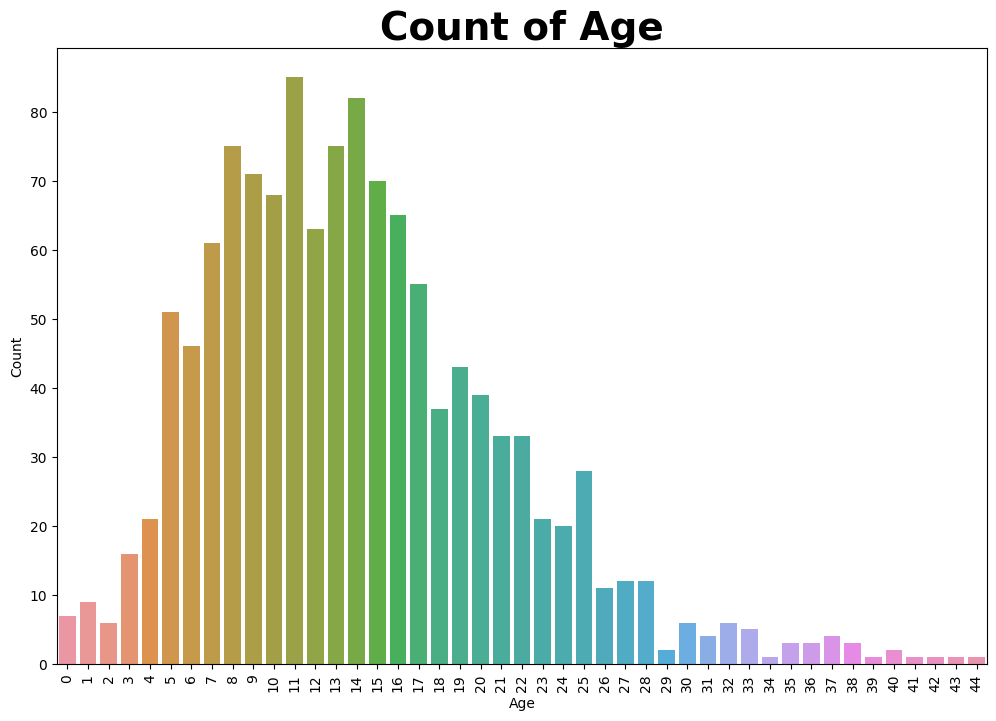

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of age counts
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x="Age")
plt.title("Count of Age", size=28, fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


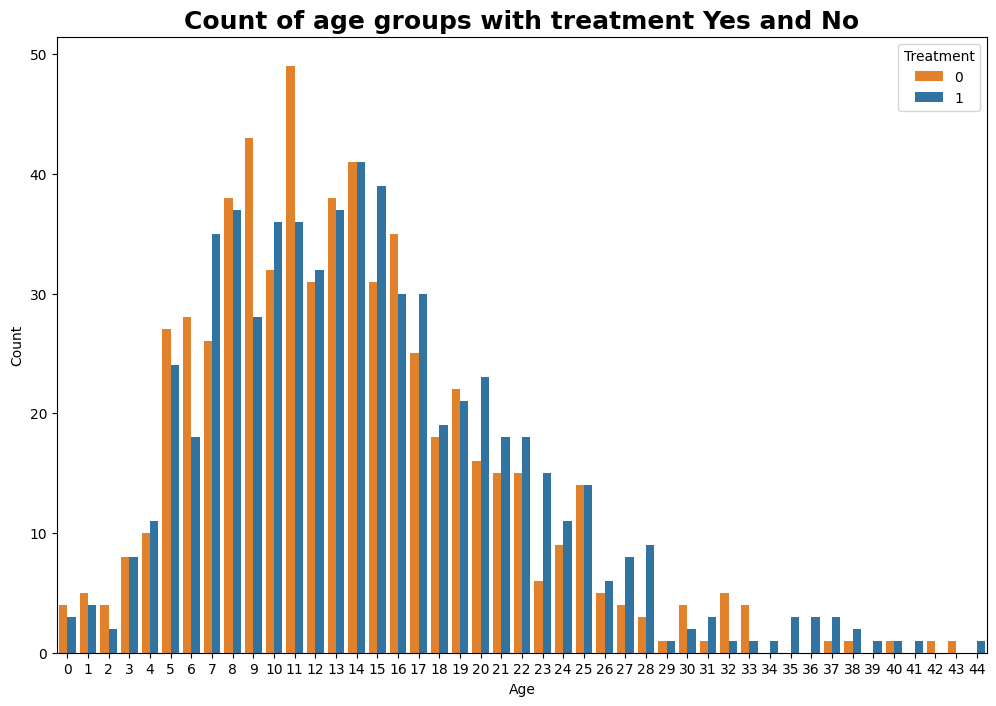

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))

# Define custom colors
colors = ["#FF7F0E", "#1F77B4"]

# Create the bar plot
sns.countplot(data=data, x="Age", hue="treatment", palette=colors)

# Set the axis labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count of age groups with treatment Yes and No", size=18, fontweight="bold")

# Display the legend
plt.legend(title="Treatment", loc="upper right")

# Show the plot
plt.show()


In [27]:
!pip install 'qiskit[machine-learning]'

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 67.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 26.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 13.2 MB/s

In [28]:
import qiskit

In [29]:
from matplotlib import pyplot as plt
import numpy as np
from qiskit import Aer, BasicAer
from qiskit.utils import QuantumInstance
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import QSVC
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    sample, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

In [ ]:
!pip install pylatexenc

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

num_features = sample.shape[1]

feature_map = QuantumCircuit(num_features)
# Build your feature map circuit here

circuit_drawer(feature_map, output='mpl').show()


In [ ]:
from qiskit.circuit.library import ZZFeatureMap

num_features = sample.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

In [ ]:
num_features = sample.shape[1]

feature_map = ZZFeatureMap(feature_dimension
                           =num_features, reps=1)

In [ ]:
from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit.primitives import Sampler

fidelity = ComputeUncompute(sampler=Sampler())

In [ ]:
from qiskit_machine_learning.kernels import FidelityQuantumKernel

feature_map = ZZFeatureMap(2)
new_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)

##  Pickling the model

In [ ]:
import pickle

In [ ]:
qsvc = QSVC(quantum_kernel=new_kernel)
qsvc.fit(train_features, train_labels)

In [ ]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = qsvc.score(test_features, test_labels)
train_score = qsvc.score(train_features, train_labels)
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

In [ ]:
from sklearn import svm

svc_ = svm.SVC()
svc_.fit(train_features, train_labels)  

In [ ]:
train_score_c4 = svc_.score(train_features, train_labels)
test_score_c4 = svc_.score(test_features, test_labels)

print(f"Classical SVR on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVR on the test dataset:     {test_score_c4:.2f}")

In [ ]:
#Mean Absolute Error(MAE)
from sklearn.metrics import mean_absolute_error 
y_preds = svc_.predict(test_features)

In [ ]:
print(classification_report(test_labels, y_preds))